# 4. 뇌 이미지들 군집 나누기 

1. Mild와 Mild 증강 분포 정규화 해서 두 놈의 차이 확인하기,

2. VAE 5배를 한 결과와, GAN의 결과까지 비교해서 분석하기


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

# 이미지 파일 경로를 읽어오는 함수
def read_images_from_path(path):
    image_files = [f for f in os.listdir(path) if f.endswith(".jpg")]
    images = [os.path.join(path, f) for f in image_files]
    return images

# 이미지를 넘파이 배열로 변환하는 함수
def images_to_numpy(images):
    image_arrays = [mpimg.imread(image_path) / 255.0 for image_path in images]  # 255로 나누어 전처리
    return np.array(image_arrays)

# 'MRI_치매_데이터' 디렉토리 내의 각 카테고리에 대한 이미지 경로 리스트 생성
base_dir1 = '/home/eunzi/더더 빌리겠습미다/2024/논문/MRI_치매_데이터__/'
Non_image_paths1 = read_images_from_path(os.path.join(base_dir1, "Non_Demented_train"))
Mild_image_paths1 = read_images_from_path(os.path.join(base_dir1, "Mild_Demented_train"))

# Non 데이터 경로를 사용하여 넘파이 배열 생성
numpy_array_Non1 = images_to_numpy(Non_image_paths1)
numpy_array_Mild1 = images_to_numpy(Mild_image_paths1)

# 'MRI_치매_데이터생성' 디렉토리 내의 각 카테고리에 대한 이미지 경로 리스트 생성
base_dir2 = '/home/eunzi/더더 빌리겠습미다/2024/논문/MRI_치매_데이터생성/'
Non_image_paths2 = read_images_from_path(os.path.join(base_dir2, "Non_train+VAE_Non_e1000_random-vector_2"))
Mild_image_paths2 = read_images_from_path(os.path.join(base_dir2, "Mild_train+VAE_Mild_e1000_random-vector_2"))

# 각 카테고리별로 이미지 경로 리스트를 분할
Non_train_paths, Non_test_paths = train_test_split(Non_image_paths2, test_size=0.2, random_state=42)
Mild_train_paths, Mild_test_paths = train_test_split(Mild_image_paths2, test_size=0.2, random_state=42)

# 분할된 이미지 경로를 사용하여 넘파이 배열 생성
numpy_array_Non2 = images_to_numpy(Non_train_paths)
numpy_array_Mild2 = images_to_numpy(Mild_train_paths)

# 모든 픽셀 값을 더하는 함수
def sum_pixel_values(image_array):
    return np.sum(image_array, axis=(1, 2))

# 정상 데이터와 경증 데이터에 대해 모든 픽셀 값의 합 계산
Non_pixel_sums1 = sum_pixel_values(numpy_array_Non1)
Mild_pixel_sums1 = sum_pixel_values(numpy_array_Mild1)
Non_pixel_sums2 = sum_pixel_values(numpy_array_Non2)
Mild_pixel_sums2 = sum_pixel_values(numpy_array_Mild2)



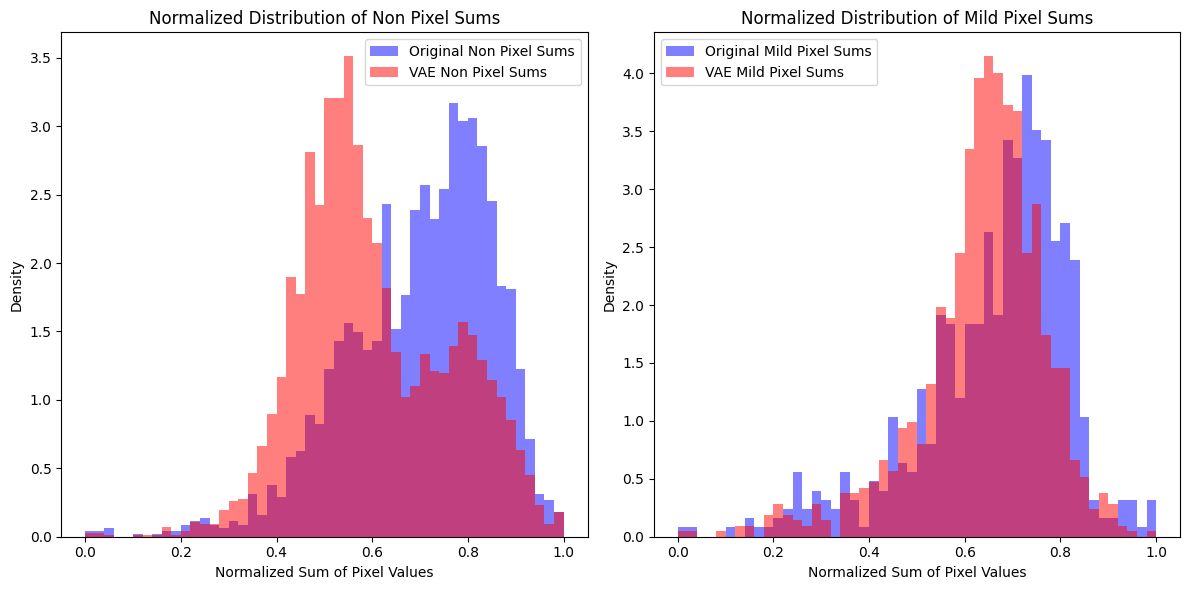

In [2]:
# 정규화 함수
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# 분포 정규화
normalized_Non_pixel_sums1 = normalize(Non_pixel_sums1)  # 원본 데이터의 정상 데이터 정규화
normalized_Non_pixel_sums2 = normalize(Non_pixel_sums2)  # 증강된 데이터의 정상 데이터 정규화
normalized_Mild_pixel_sums1 = normalize(Mild_pixel_sums1)  # 원본 데이터의 경증 데이터 정규화
normalized_Mild_pixel_sums2 = normalize(Mild_pixel_sums2)  # 증강된 데이터의 경증 데이터 정규화

# 히스토그램 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(normalized_Non_pixel_sums1, bins=50, alpha=0.5, label='Original Non Pixel Sums', color='blue', density=True)
plt.hist(normalized_Non_pixel_sums2, bins=50, alpha=0.5, label='VAE Non Pixel Sums', color='red', density=True)
plt.xlabel('Normalized Sum of Pixel Values')
plt.ylabel('Density')
plt.title('Normalized Distribution of Non Pixel Sums')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(normalized_Mild_pixel_sums1, bins=50, alpha=0.5, label='Original Mild Pixel Sums', color='blue', density=True)
plt.hist(normalized_Mild_pixel_sums2, bins=50, alpha=0.5, label='VAE Mild Pixel Sums', color='red', density=True)
plt.xlabel('Normalized Sum of Pixel Values')
plt.ylabel('Density')
plt.title('Normalized Distribution of Mild Pixel Sums')
plt.legend()

plt.tight_layout()
plt.show()

데이터를 2배로 증강을 시켰는데 왜 분포의 범위나 크기가 비슷하나요?
-> Y축을 데이터의 비율에 따라서 시각화를 해서 데이터의 갯수에 상관없이 비슷하게 보여요 

-> TMI X축은 모든 값들을 더한 결과를 0~1로 정규화 시킨 값을 시각화 시킨 것입니다.

경증의 결과

증강을 안한(파랑) 결과와 증강을 한(빨강) 결과의 차이는 별로 없었음. 따라서 경증은 기존의 이미지들에서 확인이 가능하다는 이야기임.

정상의 결과

증강을 안한(파랑) 결과와 증강을 한(빨강) 결과의 차이가 매우 남. 분포가 중간으로 이전된 것처럼 보임. 따라서 추가적인 분석이 필요함

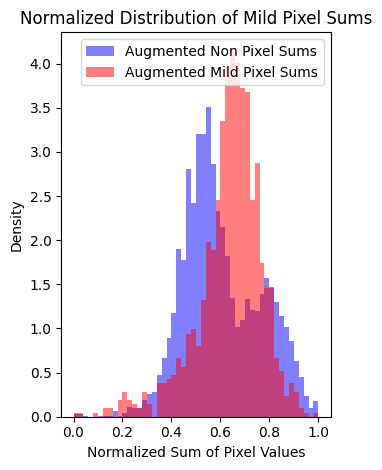

In [3]:
plt.subplot(1, 2, 1)
plt.hist(normalized_Non_pixel_sums2, bins=50, alpha=0.5, label='Augmented Non Pixel Sums', color='blue', density=True)
plt.hist(normalized_Mild_pixel_sums2, bins=50, alpha=0.5, label='Augmented Mild Pixel Sums', color='red', density=True)
plt.xlabel('Normalized Sum of Pixel Values')
plt.ylabel('Density')
plt.title('Normalized Distribution of Mild Pixel Sums')
plt.legend()

plt.tight_layout()
plt.show()

정규화를 진행한 두 데이터의 분포를 시각화 하여 보았을 때, Mild는 Non의 중간에 많이 분포를 하고 있음을 볼 수 있다

### 두 분포끼리의 차이 계산

compute_histogram 부분에서 hist = hist + epsilon 이 있는데 원래 epsilon이란 아주 작은 상수를 더해주지 않는다면 값이 무한으로 가버려서 결과가 inf로 나옴

In [4]:
from scipy.special import rel_entr

# 모든 픽셀 값을 더하는 함수
def sum_pixel_values(image_array):
    return np.sum(image_array, axis=(1, 2))

# 정상 데이터와 경증 데이터에 대해 모든 픽셀 값의 합 계산
Non_pixel_sums1 = sum_pixel_values(numpy_array_Non1)
Mild_pixel_sums1 = sum_pixel_values(numpy_array_Mild1)
Non_pixel_sums2 = sum_pixel_values(numpy_array_Non2)
Mild_pixel_sums2 = sum_pixel_values(numpy_array_Mild2)

# 히스토그램을 사용하여 동일한 구간(bin)으로 분포 계산 및 정규화
def compute_histogram(data, bins=50, density=True, epsilon=1e-10):
    hist, bin_edges = np.histogram(data, bins=bins, density=density)
    hist = hist / np.sum(hist)  # 정규화
    hist = hist + epsilon  # 매우 작은 값 추가
    return hist, bin_edges

# 각 데이터셋에 대해 히스토그램 계산
hist_Non1, bin_edges_Non1 = compute_histogram(Non_pixel_sums1)
hist_Non2, bin_edges_Non2 = compute_histogram(Non_pixel_sums2)
hist_Mild1, bin_edges_Mild1 = compute_histogram(Mild_pixel_sums1)
hist_Mild2, bin_edges_Mild2 = compute_histogram(Mild_pixel_sums2)

# KL divergence 계산 함수
def kl_divergence(p, q):
    return np.sum(rel_entr(p, q))

# JS divergence 계산 함수
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * (kl_divergence(p, m) + kl_divergence(q, m))

# KL divergence 및 JS divergence 계산
kl_divergence_non = kl_divergence(hist_Non1, hist_Non2)
js_divergence_non = js_divergence(hist_Non1, hist_Non2)
kl_divergence_mild = kl_divergence(hist_Mild1, hist_Mild2)
js_divergence_mild = js_divergence(hist_Mild1, hist_Mild2)

print(f"KL divergence for Non data: {kl_divergence_non}")
print(f"JS divergence for Non data: {js_divergence_non}")
print(f"KL divergence for Mild data: {kl_divergence_mild}")
print(f"JS divergence for Mild data: {js_divergence_mild}")

KL divergence for Non data: 0.2711465443952202
JS divergence for Non data: 0.06850342612726587
KL divergence for Mild data: 0.32630809029662355
JS divergence for Mild data: 0.043800607706467334


분포 비교에 사용한 수식

KL Divergence: 두 확률 분포 P와 Q 사이의 차이를 측정하는 비대칭적 방법. 값이 클수록 두 분포 사이의 차이가 큼

JS Divergence: KL divergence를 대칭화한 것으로, 두 분포 간의 유사성을 측정. 값이 클수록 두 분포 사이의 차이가 큼

결론 

시각적으로는 Non의 분포가 더 달라 보이나, 위의 계산을 통해서 값을 확인하니, Mild의 분포가 큰 차이를 냄을 볼 수 있다.

In [5]:
# KL divergence 및 JS divergence 계산
kl_divergence_non = kl_divergence(hist_Non1, hist_Mild1)
js_divergence_non = js_divergence(hist_Non1, hist_Mild1)
kl_divergence_mild = kl_divergence(hist_Non2, hist_Mild2)
js_divergence_mild = js_divergence(hist_Non2, hist_Mild2)

print(f"KL divergence for Non and Mild: {kl_divergence_non}")
print(f"JS divergence for Non and Mild: {js_divergence_non}")
print(f"KL divergence for VAE Non and Mild: {kl_divergence_mild}")
print(f"JS divergence for VAE Non and Mild: {js_divergence_mild}")

KL divergence for Non and Mild: 0.22296116406237537
JS divergence for Non and Mild: 0.04036902367132157
KL divergence for VAE Non and Mild: 0.5093466208395928
JS divergence for VAE Non and Mild: 0.08918647699063628


추가적인 분석 결과

증강 X의 분포끼리의 차이인 D_kl은 증강을 한 결과보다 값이 작아서 두 분포의 차이가 작고, 두 분포간의 유사성이 높다.


그렇다면 전체 집합에서 교집합을 빼거나, 교집합만 따로 확인을 한다면 원가 보이지 않을까?

아니면 분포의 차이가 난다는 부분만 따로 확인을 한다면 확실하게 VAE가 어떤 특징을 뽑아서 이미지 생성을 했는지 확인을 할 수 있지 않을까?




In [6]:
# KL divergence 및 JS divergence 계산
kl_divergence_non = kl_divergence(hist_Non1, hist_Mild2)
js_divergence_non = js_divergence(hist_Non1, hist_Mild2)
kl_divergence_mild = kl_divergence(hist_Mild1, hist_Non2)
js_divergence_mild = js_divergence(hist_Mild1, hist_Non2)

print(f"KL divergence for Non and VAE Mild: {kl_divergence_non}")
print(f"JS divergence for Non and VAE Mild: {js_divergence_non}")
print(f"KL divergence for Mild and VAE Non: {kl_divergence_mild}")
print(f"JS divergence for Mild and VAE Non: {js_divergence_mild}")

KL divergence for Non and VAE Mild: 0.4760732316221811
JS divergence for Non and VAE Mild: 0.07055379559731137
KL divergence for Mild and VAE Non: 0.374078884943969
JS divergence for Mild and VAE Non: 0.09183122708836412
